# Python for Data Science & Analysis 
## Exploratory Data Analysis & Visualization

## Objectives
* write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
 

# Visualization

## How do I use pandas to plot?

Pandas has a `.plot` which you configure using its arguments (eg., `kind=hist`), this however *just uses* seaborn. 

In [1]:
import pandas as pd
ti = pd.read_csv('data/titanic.csv')
ti.head(3)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


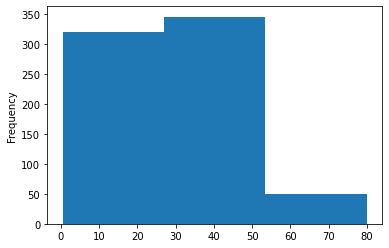

In [2]:
ti['age'].plot(kind='hist',bins=3);

Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn. 

## How do I use seaborn to visualize data?

In [3]:
import seaborn as sns


### Checks for emptiness and cleanse data

In [4]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 
# How can we fix the Future warning, and what does it mean?

C:\Users\ignacio\AppData\Local\Temp\ipykernel_13828\417693801.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ti=ti.fillna(ti.mean())


In [6]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

### Using Seaborn

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


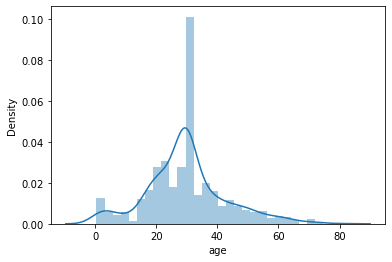

In [7]:
sns.distplot(ti['age'], kde=True);
# How can we fix the Future warning, and what does it mean?

##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


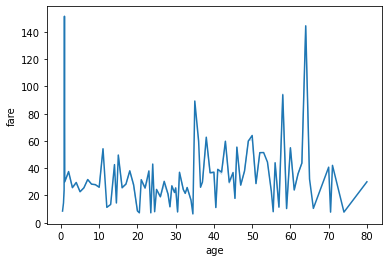

In [8]:
sns.lineplot(ti['age'], ti['fare'],ci=0);
# How can we fix the Future warning, and what does it mean?


## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`... 

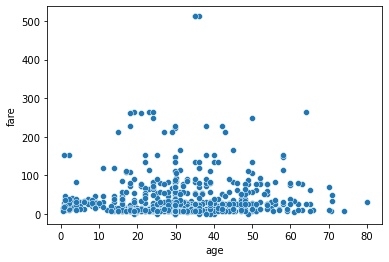

In [9]:
sns.scatterplot(data=ti, x='age', y='fare');


## How do I create a distribution plot?

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


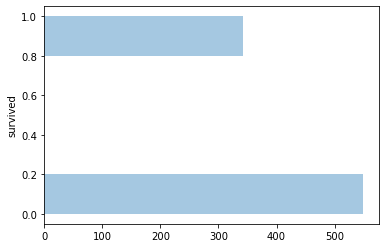

In [10]:
sns.distplot(ti['survived'], vertical=True, kde=False);
# How can we fix the Future warning, and what does it mean?

Dealing with the future warnings of the last plot, note the difference in how the chart is made horozontal.

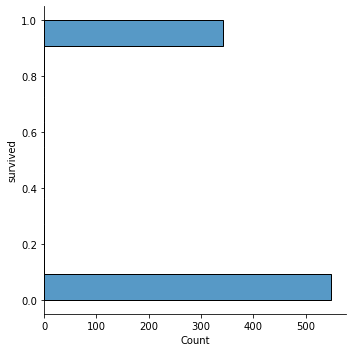

In [11]:
sns.displot(y=ti['survived'], kde=False);

## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column... 

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


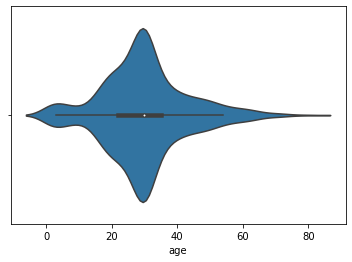

In [12]:
sns.violinplot(ti['age']);
# How can we fix the Future warning, and what does it mean?

## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers. 

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

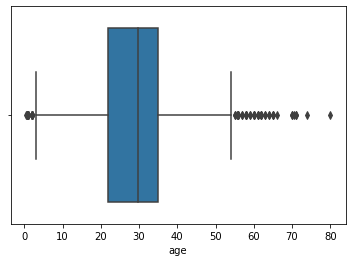

In [13]:
sns.boxplot(ti['age'])


## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

<AxesSubplot:xlabel='survived', ylabel='age'>

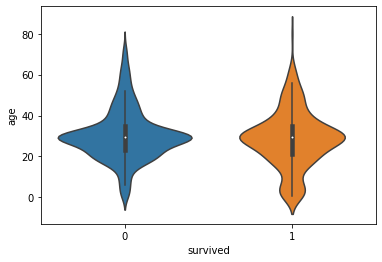

In [14]:
sns.violinplot(data=ti, x='survived', y='age')


<AxesSubplot:xlabel='age', ylabel='embark_town'>

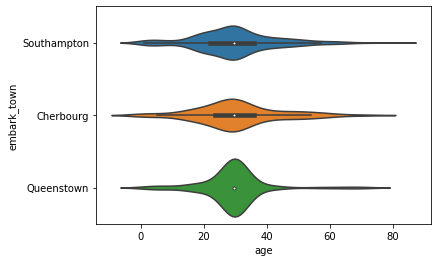

In [15]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

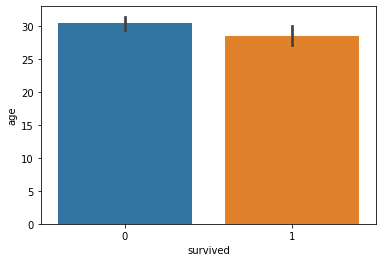

In [16]:
sns.barplot(data=ti, x='survived', y='age');


## How do I create a line plot?

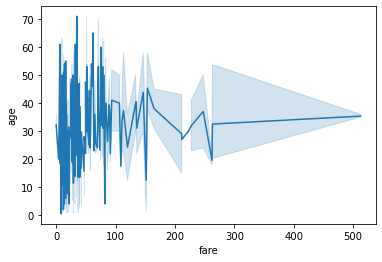

In [17]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?

## How do I create a scatter plot?

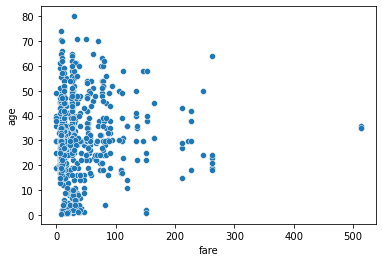

In [18]:
sns.scatterplot(data=ti, x='fare', y='age');


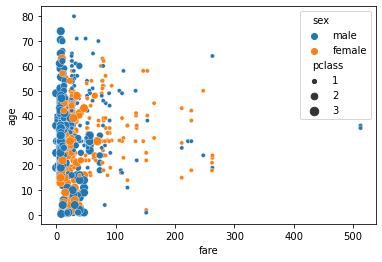

In [19]:
sns.scatterplot(data=ti, 
                x='fare', 
                y='age', 
                hue = 'sex', 
                size = 'pclass');

### EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

## Exercise (30 min)

## Step 1 (5 min)
* review seaborn individually, try a few plots

## Step 2 (40 min)

* What affected your chances of survival on the titanic?
    * brainstorm & execute an analysis of the titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question. 

#### Once we have completed we will share examples of what displays we used
#### There is no one right way to do this, so don;t worry, experimetning is key

### Consider:
* Univariate (single-col) plots
    * sns.distplot 
        * of survived
    * sns.violinplot 
        * of fare
    * sns.boxplot
        * of age

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare